In [1]:
from math import pi
import matplotlib.pyplot as plt
# from pennylane import numpy as np
import pennylane as qml
from pennylane.optimize import AdamOptimizer
import datetime
now=datetime.datetime.now
import numpy as np
import time

In [2]:
num_qubits=1
dev=qml.device('default.qubit', wires=num_qubits)
seed = 37
np.random.seed(seed)
print(seed)

37


In [3]:
@qml.qnode(dev, diff_method="backprop", interface="autograd")
def hepler(encoded_x,theta):
    qml.QubitStateVector(encoded_x,wires=[i for i in range(num_qubits)])

    qml.RY(wires=0,phi=theta[0])
    qml.RZ(wires=0,phi=theta[1])
    qml.RY(wires=0,phi=theta[2])
    # qml.RZ(wires=0,phi=theta[3])

    # qml.RY(wires=1,phi=theta[1])
    # qml.CNOT(wires=[0,1])
    # return qml.probs(wires=[0,1])
    # return qml.probs(wires=[0])
    return qml.expval(qml.PauliZ(wires=0))

In [4]:
def encoder(x):
    # vector_x = [x,x**2,x**3,x**4]
    vector_x = [1,x]
    # vector_x = [x+x**2,1+x**3]
    norm_x = np.linalg.norm(vector_x)
    return vector_x/norm_x , norm_x

In [5]:

def f(theta,w,x):
    encoded_x,norm_x = encoder(x)
    f_val = hepler(encoded_x,theta)
    # rescale_coef = abs(w[0])
    rescale_coef = w[0]
    # return (f_val[1]*(norm_x**2))*rescale_coef+w[1]
    return (f_val*(norm_x**2))*rescale_coef+w[1]
    # print(qml.draw(hepler)(encoded_x))

In [6]:
#Initial Values
# del1, w1, del2, w2, del3, w3, P_e1, P_e2, P_e3
# del1_val0, w1_val0, del2_val0, w2_val0, del3_val0, w3_val0, 
P_e1_val, P_e2, P_e3 = [ 1.43824549482149, 1.040964945989, 0.757527164510807]
del1_val0 = 0.23672413559442118
w1_val0 = 1.0000490207639863
del2_val0 = 0.7115897422307673
w2_val0 = 0.9998729391026364
del3_val0 = 0.5503448634622892
w3_val0 = 0.99991431085359


In [7]:
# Differential equation parameters

# Ws, H1, H2, H3, D1, D2, D3
Ws, H1, H2, H3, D1, D2, D3 = (376.9911, 23.64, 6.4, 3.01, 23.64, 6.4, 3.01)

# P_m1, P_m2, P_m3, X_d_p1, X_d_p2, X_d_p3
P_m1, P_m2, P_m3, X_d_p1, X_d_p2, X_d_p3 = (0.7164, 1.63, 0.85, 0.0608, 0.1198, 0.1813)

# e_q_p1, e_q_p2, e_q_p3, R_a1, R_a2, R_a3
e_q_p1, e_q_p2, e_q_p3, R_a1, R_a2, R_a3 = (1.0566, 1.0502, 1.0170, 0, 0, 0)

# a11-a26 of Y
a_11, a_12, a_13, a_14, a_15, a_16, a_21, a_22, a_23, a_24, a_25, a_26 = (0.8455, 2.9883, 0.2871, -1.5129, 0.2096, -1.2256, -2.9883, 0.8455, 1.5129, 0.2871, 1.2256, 0.2096)

# a31-a46 of Y
a_31, a_32, a_33, a_34, a_35, a_36, a_41, a_42, a_43, a_44, a_45, a_46 = (0.2871, -1.5129, 0.4200, 2.7239, 0.2133, -1.0879, 1.5129, 0.2871, -2.7239, 0.4200, 1.0879, 0.2133)

# a51-a56 of Y
a_51, a_52, a_53, a_54, a_55, a_56 = (0.2096, -1.2256, 0.2133, -1.0879, 0.2770, 2.3681)

# a61-a66 of Y
a_61, a_62, a_63, a_64, a_65, a_66 = (1.2256, 0.2096, 1.0879, 0.2133, -2.3681, 0.2770)

In [8]:
cos = np.cos
sin = np.sin

In [9]:
def f1(del1,del2,del3):
   return (-R_a1*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + X_d_p1*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3)) 
            + e_q_p1*cos(del1))*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + (-R_a1*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3)) 
            - X_d_p1*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + e_q_p1*sin(del1))*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3))

def f2(del1,del2,del3):
   return (-R_a2*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + X_d_p2*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3)) 
            + e_q_p2*cos(del2))*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + (-R_a2*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3)) 
            - X_d_p2*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + e_q_p2*sin(del2))*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3))

def f3(del1,del2,del3):
    return (-R_a3*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + X_d_p3*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3)) 
            + e_q_p3*cos(del3))*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + (-R_a3*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3)) 
            - X_d_p3*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + e_q_p3*sin(del3))*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3))

In [10]:
def DE1(delta1,delta2,delta3,delta1_prime,delta1_double_prime):
    right_hand = (Ws/2*H1)*(P_m1-f1(delta1,delta2,delta3)-D1*delta1_prime)
    return delta1_double_prime - right_hand

def DE2(delta1,delta2,delta3,delta2_prime,delta2_double_prime):
    right_hand = (Ws/2*H2)*(P_m2-f2(delta1,delta2,delta3)-D2*delta2_prime)
    return delta2_double_prime - right_hand

def DE3(delta1,delta2,delta3,delta3_prime,delta3_double_prime):
    right_hand = (Ws/2*H3)*(P_m3-f3(delta1,delta2,delta3)-D3*delta3_prime)
    return delta3_double_prime - right_hand

In [11]:
n_grid = 20
range_min = 4
range_max = 6
t_data = np.linspace(range_min, range_max, n_grid)
dt = t_data[1]-t_data[0]

In [12]:
def callbackF(parameters):
    # global current_loss

    print("Current loss:", loss(parameters)) 


def loss(params):
    global w
    global theta
 
    # Reshape the flattened theta back to its original shape
    w = np.reshape(params[:w.size], w.shape)
    theta = np.reshape(params[w.size:], theta.shape)
    w1 = w[0]
    w2= w[1]
    w3 = w[2]
    theta1 = theta[0]
    theta2 = theta[1]
    theta3 = theta[2]


    u1 = np.zeros(n_grid + 2)
    u2 = np.zeros(n_grid + 2)
    u3 = np.zeros(n_grid + 2)
    
    u1[0] = f(theta1,w1, range_min - dt)
    u1[1] = del1_val0

    u2[0] = f(theta2,w2, range_min - dt)
    u2[1] = del2_val0

    u3[0] = f(theta3,w3, range_min - dt)
    u3[1] = del3_val0

    for i in range(1, n_grid):
        u1[i + 1] = f(theta1,w1, t_data[i])
        u2[i + 1] = f(theta2,w2, t_data[i])
        u3[i + 1] = f(theta3,w3, t_data[i])


    u1[n_grid + 1]=f(theta1,w1, range_max + dt)  
    u2[n_grid + 1]=f(theta2,w2, range_max + dt)  
    u3[n_grid + 1]=f(theta3,w3, range_max + dt)  
    
    u1_prime = (u1[2:] - u1[:-2])/(2*dt)
    omega1_0 = (1/Ws)*u1_prime[0]+1
    u1_double_prime = (u1_prime[2:] - u1_prime[:-2])/(2*dt)

    u2_prime = (u2[2:] - u2[:-2])/(2*dt)
    omega2_0 = (1/Ws)*u2_prime[0]+1
    u2_double_prime = (u2_prime[2:] - u2_prime[:-2])/(2*dt)

    u3_prime = (u3[2:] - u3[:-2])/(2*dt)
    omega3_0 = (1/Ws)*u3_prime[0]+1
    u3_double_prime = (u3_prime[2:] - u3_prime[:-2])/(2*dt)


    # u_prime = f_prime(a, b, c, d,t_data)
    # u_double_prime = f_double_prime(a, b, c, d,t_data)

    loss_i_DE1 = np.sum((DE1(delta1=u1[2:-2],delta2=u2[2:-2],delta3=u3[2:-2],delta1_prime=u1_prime[1:-1],delta1_double_prime=u1_double_prime)**2))
    loss_i_DE2 = np.sum((DE2(delta1=u1[2:-2],delta2=u2[2:-2],delta3=u3[2:-2],delta2_prime=u2_prime[1:-1],delta2_double_prime=u2_double_prime)**2))
    loss_i_DE3 = np.sum((DE3(delta1=u1[2:-2],delta2=u2[2:-2],delta3=u3[2:-2],delta3_prime=u3_prime[1:-1],delta3_double_prime=u3_double_prime)**2))



    loss_i = loss_i_DE1 + loss_i_DE2 + 100*loss_i_DE3
    # loss_i = np.sum((DE(f=u[2:-2],f_prime=u_prime[1:-1],f_double_prime=u_double_prime,t=t_data[1:-1]))**2)
    # loss_i = np.sum(np.abs(DE(f=u,f_prime=u_prime,f_double_prime=u_double_prime,t=t_data)))

    eta = 5
    # del0_pred = f(a, b, c, d, 0)
    # omega0_pred = f_prime(a, b, c, d, 0) + ws
    # loss_b = eta * (del_0_v - del0_pred) ** 2 * len(t_data)

    loss_b = 0
    loss_b += eta * (omega1_0 - w1_val0) ** 2 * len(t_data)
    loss_b += eta * (omega2_0 - w2_val0) ** 2 * len(t_data)
    loss_b += eta * (omega3_0 - w3_val0) ** 2 * len(t_data)
    # loss_b += eta * (omega_0_v - omega_0) ** 2 * len(t_data)

    # loss = 10*loss_i+8*loss_b
    loss = (loss_i+loss_b) / len(t_data)
    # loss = loss_i
    # print("Current loss:", loss) 

    return loss/10000


In [13]:
import numpy as np
from scipy.optimize import minimize
import random

# Initialize w and theta with random values
np.random.seed(20)  # Set a seed for reproducibility
# w = np.random.rand(3, 3)*0
# theta = np.random.rand(3, 4, 2)

w = np.array([np.zeros(3),np.zeros(3),np.zeros(3)])
theta = np.random.uniform(0, 2 * np.pi, size=(3,3))


# Create initial_params as a list
initial_params = [w, theta]

# Flatten initial_params into a 1D array
initial_params_flat = np.concatenate([initial_params[0].flatten(), initial_params[1].flatten()])
start_time = time.time()

# Call minimize with the wrapper function
result = minimize(loss, initial_params_flat, callback=callbackF, method='BFGS', options={'gtol': 1E-2})

end_time = time.time()
runtime = end_time - start_time
print(f"Runtime: {runtime} seconds")

# Extract the optimized values of w and theta from the result
optimized_params_flat = result.x
w = np.reshape(optimized_params_flat[:w.size], w.shape)
theta = np.reshape(optimized_params_flat[w.size:], theta.shape)


# SAVE PARAMETERS
# Generate a random string for the file name
random_string = ''.join(random.choices('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789', k=8))

# Get the current time as a timestamp
timestamp = int(time.time())

# Combine the timestamp and random string to create the file name
file_name = f"{range_min}-{range_max}_data_{timestamp}_{random_string}.npz"

# Save the data to a file using np.savez
np.savez(file_name, w=w, theta=theta)

print(f"Data saved to file: {file_name}")

Current loss: 44343.77610849762
Current loss: 13503.9205160005
Current loss: 10164.065529544821
Current loss: 5222.353230344873
Current loss: 4377.902459695457
Current loss: 4130.412300934999
Current loss: 3660.8946407400435
Current loss: 2771.4733975589807
Current loss: 2163.2003033436376
Current loss: 1193.6288458972815
Current loss: 1085.0041337619075
Current loss: 914.8728514699983
Current loss: 861.06195126403
Current loss: 764.9518689562836
Current loss: 580.7927771200851
Current loss: 269.46386444453566
Current loss: 133.4136036232414
Current loss: 68.44744330601829
Current loss: 67.70614540976595
Current loss: 61.05894892486377
Current loss: 49.5518234605302
Current loss: 35.05290313611214
Current loss: 31.6305227705986
Current loss: 30.321507047380916
Current loss: 28.584428972956456
Current loss: 27.486752591944988
Current loss: 26.421358281207723
Current loss: 26.031699484742333
Current loss: 25.879186345387442
Current loss: 25.760329048448476
Current loss: 25.74322060637109

In [14]:
del1_target_values=[0.23672413559442118, 0.23868617866207442, 0.24056958695783312, 0.24237739991499824, 0.24411254966165924, 0.24577788882589813, 0.24737612870143552, 0.24890988678561546, 0.2503816918256177, 0.25179398381845763, 0.2531491140109865, 0.2544493448998912, 0.25569685023169436, 0.2568937131994589, 0.25804198214764734, 0.2591435881727507, 0.2602003781277354, 0.26121413632075896, 0.26218658451517046, 0.26311938192951]
omega1_target_values=[1.0000504594764823, 1.0000484389707336, 1.000046496417227, 1.0000446287785123, 1.0000428338074419, 1.0000411087918222, 1.0000394511682151, 1.0000378585873102, 1.0000363287177503, 1.000034859246131, 1.0000334478770017, 1.000032092332864, 1.0000307903541732, 1.000029540060899, 1.0000283396630818, 1.000027187074977, 1.0000260805342651, 1.0000250183161667, 1.0000239987334423, 1.000023020136394]
del2_target_values=[0.7115897422307673, 0.7068092752672287, 0.7022039133236059, 0.6977683402878398, 0.6934972706547367, 0.6893855503455413, 0.6854280467330164, 0.6816197215365047, 0.6779556425898267, 0.6744309838412811, 0.6710410253536451, 0.6677811533041736, 0.6646468599846002, 0.6616337404110993, 0.6587374930681498, 0.6559539530280413, 0.6532790709902876, 0.6507089109583296, 0.6482396502395354, 0.645867579445201]
omega2_target_values=[0.9998772844751934, 0.9998817631471656, 0.9998861073695898, 0.999890319750608, 0.999894399997779, 0.9998983505894845, 0.9999021737429343, 0.9999058711794161, 0.9999094450221808, 0.9999128977964437, 0.999916232429383, 0.9999194522501411, 0.9999225609898238, 0.9999255606643878, 0.9999284531217977, 0.9999312423965473, 0.9999339310039198, 0.9999365215730096, 0.9999390168467216, 0.9999414196817715]
del3_target_values=[0.5503448634622892, 0.547080170659684, 0.5439657143992093, 0.5409938291264373, 0.5381573088901174, 0.5354491980518337, 0.5328631692514054, 0.5303932193015083, 0.5280336422898425, 0.5257790295791331, 0.52362426980713, 0.5215645488866071, 0.5195953500053637, 0.5177124388962125, 0.5159116225840494, 0.514189091161061, 0.5125412610124211, 0.5109647029942477, 0.5094561424336033, 0.5080124591284948]
omega3_target_values=[0.9999157705860323, 0.9999196564151657, 0.9999233428064149, 0.9999268432890407, 0.9999301662576324, 0.9999333227603009, 0.9999363225052338, 0.9999391738001281, 0.9999418847487046, 0.9999444632507068, 0.9999469170019022, 0.9999492534940805, 0.9999514800150554, 0.999953601647083, 0.999955623157021, 0.9999575508425018, 0.9999593892114527, 0.9999611426466298, 0.9999628154056175, 0.999964411620829]

In [15]:
w1 = w[0]
w2= w[1]
w3 = w[2]
theta1 = theta[0]
theta2 = theta[1]
theta3 = theta[2]

20
20
0.26311938192951


Text(0.5, 1.0, 'Fitting Data')

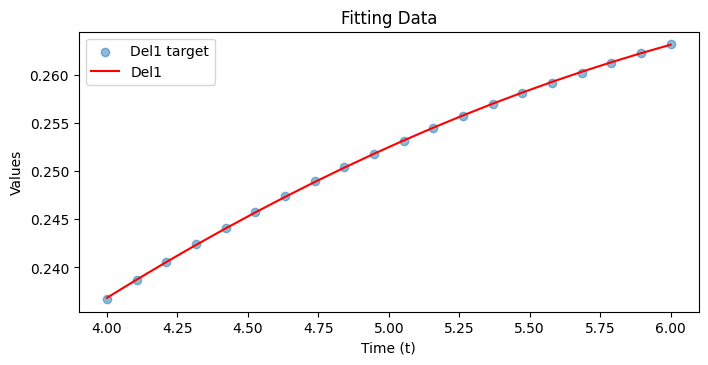

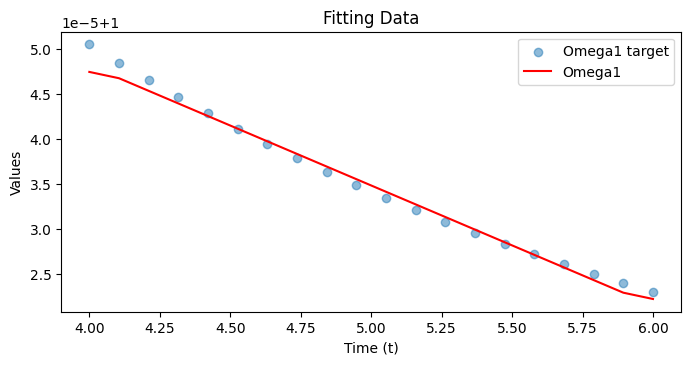

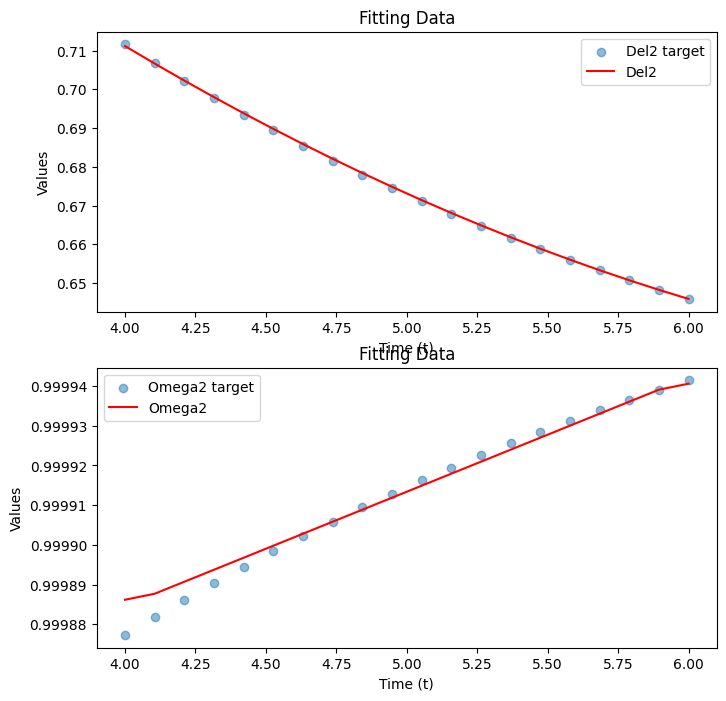

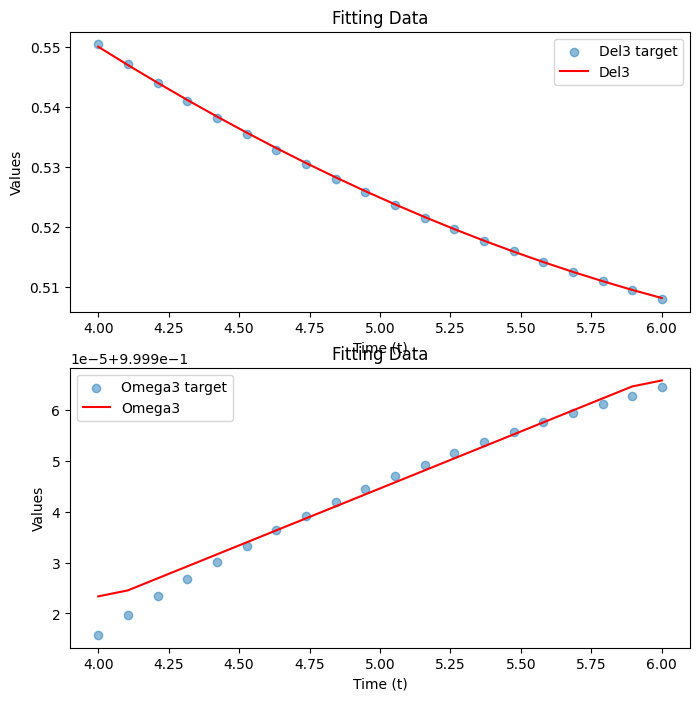

In [16]:
import matplotlib.pyplot as plt

# t2_data = [t_data[i] for i in range(0,len(t_data),2) ]
# del1_target_values_2 =  [del1_target_values[i] for i in range(0,len(del1_target_values),2) ]
# print(len(t2_data))
# print(len(del1_target_values_2))


print(len(t_data))
print(len(del1_target_values))



# delta1_omega1
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del1_target_values, label='Del1 target', alpha=0.5)
delta_pred1 = [f(theta1,w1,ti) for ti in t_data]
plt.plot(t_data, delta_pred1, 'r', label='Del1')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')

print(del1_target_values[-1])


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 2)
plt.scatter(t_data, omega1_target_values, label='Omega1 target', alpha=0.5)
delta_pred1_prime = np.gradient(delta_pred1, t_data)
omega_pred1 = (1/Ws)*delta_pred1_prime+1
plt.plot(t_data, omega_pred1, 'r', label='Omega1')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')



# delta2_omega2
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del2_target_values, label='Del2 target', alpha=0.5)
delta_pred2 = [f(theta2,w2,ti) for ti in t_data]
plt.plot(t_data, delta_pred2, 'r', label='Del2')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')

plt.subplot(2, 1, 2)
plt.scatter(t_data, omega2_target_values, label='Omega2 target', alpha=0.5)
delta_pred2_prime = np.gradient(delta_pred2, t_data)
omega_pred2 = (1/Ws)*delta_pred2_prime+1
plt.plot(t_data, omega_pred2, 'r', label='Omega2')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')



# delta3_omega3
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del3_target_values, label='Del3 target', alpha=0.5)
delta_pred3 = [f(theta3,w3,ti) for ti in t_data]
plt.plot(t_data, delta_pred3, 'r', label='Del3')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')

plt.subplot(2, 1, 2)
plt.scatter(t_data, omega3_target_values, label='Omega3 target', alpha=0.5)
delta_pred3_prime = np.gradient(delta_pred3, t_data)
omega_pred3 = (1/Ws)*delta_pred3_prime+1
plt.plot(t_data, omega_pred3, 'r', label='Omega3')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')


# # delta3_omega3
# plt.figure(figsize=(8, 8))
# plt.subplot(2, 1, 1)
# plt.scatter(t_data, del3_target_values, label='Del3 target', alpha=0.5)
# delta_pred3 = [f(theta3,w3,ti) for ti in t_data]
# plt.plot(t_data, delta_pred3, 'r', label='Del3')
# plt.xlabel('Time (t)')
# plt.ylabel('Values')
# plt.legend()
# plt.title('Fitting Data')


# plt.subplot(2, 1, 2)
# plt.scatter(t_data, omega3_target_values, label='Omega3 target', alpha=0.5)
# delta_pred3_prime = np.gradient(del3_target_values, t_data)
# print(delta_pred3_prime)
# # delta_pred3_prime=np.array([(delta_pred3[i+1] - delta_pred3[i])/dt for i in range(len(delta_pred3)-1)])
# delta_pred3_prime = np.gradient(delta_pred3, t_data)
# print(delta_pred3_prime)
# print(1/Ws)
# omega_pred3 = (1/Ws)*delta_pred3_prime+1
# plt.plot(t_data, omega_pred3, 'r', label='Omega3')
# plt.xlabel('Time (t)')
# plt.ylabel('Values')
# plt.legend()
# plt.title('Fitting Data')

In [17]:
print(delta_pred3)
print(del3_target_values)

[tensor(0.54996782, requires_grad=True), tensor(0.54692631, requires_grad=True), tensor(0.54397831, requires_grad=True), tensor(0.54112384, requires_grad=True), tensor(0.53836289, requires_grad=True), tensor(0.53569546, requires_grad=True), tensor(0.53312154, requires_grad=True), tensor(0.53064114, requires_grad=True), tensor(0.52825427, requires_grad=True), tensor(0.52596091, requires_grad=True), tensor(0.52376107, requires_grad=True), tensor(0.52165475, requires_grad=True), tensor(0.51964194, requires_grad=True), tensor(0.51772266, requires_grad=True), tensor(0.5158969, requires_grad=True), tensor(0.51416465, requires_grad=True), tensor(0.51252593, requires_grad=True), tensor(0.51098072, requires_grad=True), tensor(0.50952903, requires_grad=True), tensor(0.50817086, requires_grad=True)]
[0.5503448634622892, 0.547080170659684, 0.5439657143992093, 0.5409938291264373, 0.5381573088901174, 0.5354491980518337, 0.5328631692514054, 0.5303932193015083, 0.5280336422898425, 0.5257790295791331, 

In [18]:
print('del1_val0 =',del1_target_values[-1])
print('w1_val0 =',omega_pred1[-1])
print('del2_val0 =',del2_target_values[-1])
print('w2_val0 =',omega_pred2[-1])
print('del3_val0 =',del3_target_values[-1])
print('w3_val0 =',omega_pred3[-1])

del1_val0 = 0.26311938192951
w1_val0 = 1.0000222000661134
del2_val0 = 0.645867579445201
w2_val0 = 0.9999406063088762
del3_val0 = 0.5080124591284948
w3_val0 = 0.999965774756822


In [19]:
print('del1=',[float(delta_pred1[i]) for i in range(len(delta_pred1))])
print('del2=',[float(delta_pred2[i]) for i in range(len(delta_pred2))])
print('del3=',[float(delta_pred3[i]) for i in range(len(delta_pred3))])
print('omega1=',[float(omega_pred1[i]) for i in range(len(omega_pred1))])
print('omega2=',[float(omega_pred2[i]) for i in range(len(omega_pred2))])
print('omega3=',[float(omega_pred3[i]) for i in range(len(omega_pred3))])


del1= [0.2368487357715383, 0.23873011688803414, 0.24055591968135748, 0.24232614415150822, 0.24404079029848644, 0.24569985812229234, 0.24730334762292547, 0.2488512588003862, 0.25034359165467446, 0.25178034618579004, 0.253161522393733, 0.2544871202785038, 0.25575713984010173, 0.25697158107852713, 0.25813044399378027, 0.25923372858586075, 0.26028143485476873, 0.2612735628005041, 0.26221011242306697, 0.26309108372245715]
del2= [0.7111794460218475, 0.7066619837558341, 0.7022645507212667, 0.6979871469181455, 0.6938297723464706, 0.6897924270062414, 0.6858751108974587, 0.6820778240201217, 0.6784005663742312, 0.6748433379597865, 0.6714061387767878, 0.6680889688252356, 0.6648918281051293, 0.661814716616469, 0.6588576343592548, 0.6560205813334866, 0.6533035575391646, 0.6507065629762887, 0.6482295976448589, 0.6458726615448755]
del3= [0.5499678156347011, 0.5469263057375906, 0.5439783147407677, 0.5411238426442317, 0.538362889447983, 0.5356954551520214, 0.5331215397563474, 0.5306411432609598, 0.52825